# Get the Data 

In [2]:
import pandas as pd 

In [8]:
data = pd.read_csv("../data/fixed_ayd_data.csv",delimiter=';', names=["SidSecenek", "url", "pattern", "BuyerGroup"])
data.head() 

,SidSecenek,url,pattern,BuyerGroup
0,5,https://resim.aydinli.com.tr/02/1/0GU/S4003424...,ÇIZGILI,DOKUMA UST
1,160,https://resim.aydinli.com.tr/08/1/0TH/S3001996...,SAÇ ÖRGÜ,TRIKO
2,297,https://resim.aydinli.com.tr/08/3/0TH/S5008832...,RINGELLI,TRIKO
3,392,https://resim.aydinli.com.tr/08/1/0GU/S3001828...,EKOSE,DOKUMA UST
4,476,https://resim.aydinli.com.tr/02/1/011/S3001786...,JAKARLI,ORME UST


In [9]:
data.shape 

(28559, 4)

# Split the Data 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.url, data.pattern, test_size=0.2, random_state=47)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=47)

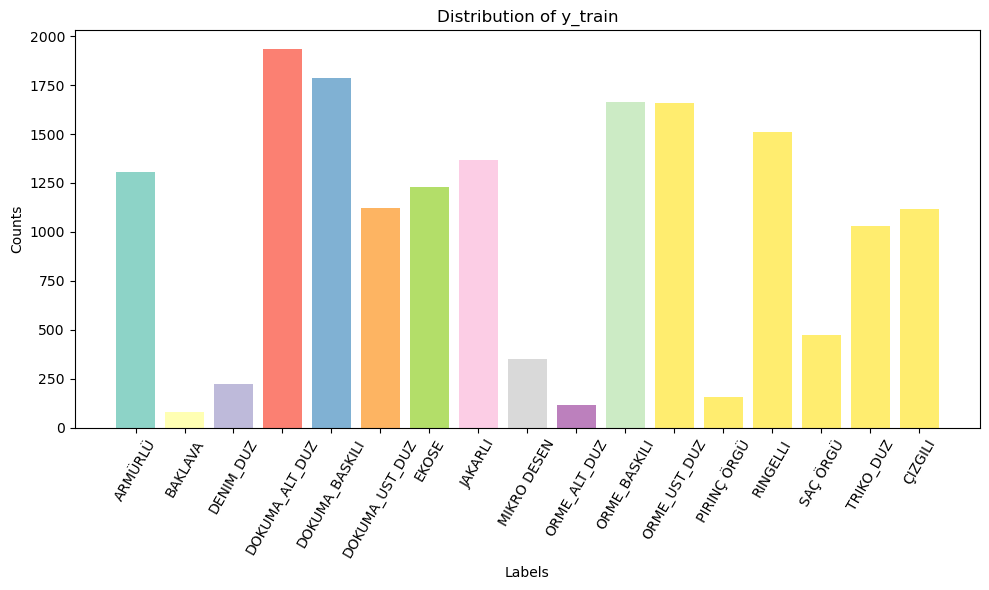

In [25]:
import matplotlib.pyplot as plt 
import numpy as np 

unique_labels, label_counts = np.unique(y_train, return_counts=True)
color_palette = plt.get_cmap('Set3')  # Choose a colormap
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_labels, label_counts, color=color_palette(range(len(unique_labels))))
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of y_train')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

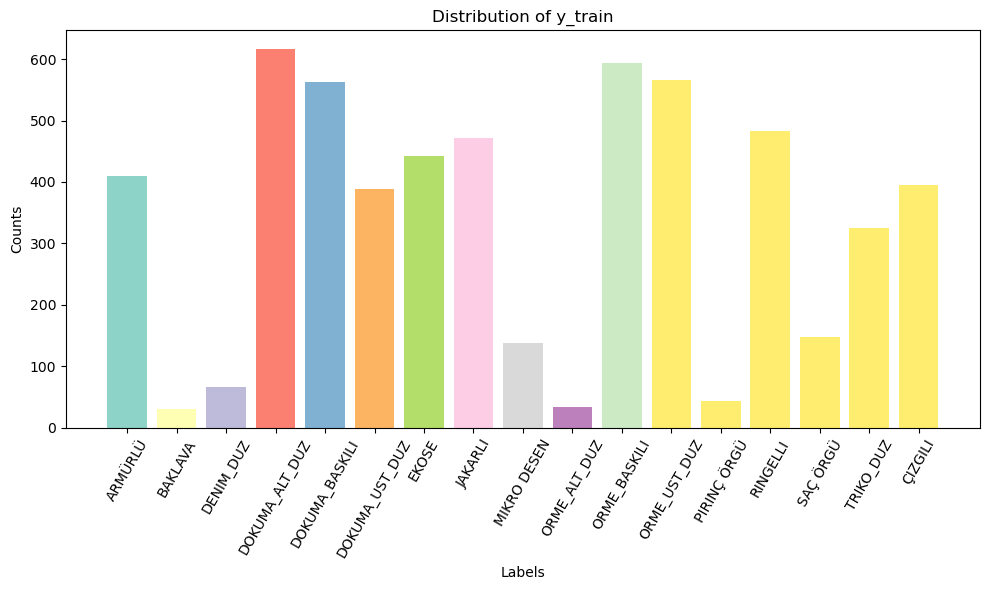

In [26]:
unique_labels, label_counts = np.unique(y_test, return_counts=True)
color_palette = plt.get_cmap('Set3')  # Choose a colormap
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_labels, label_counts, color=color_palette(range(len(unique_labels))))
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of y_train')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

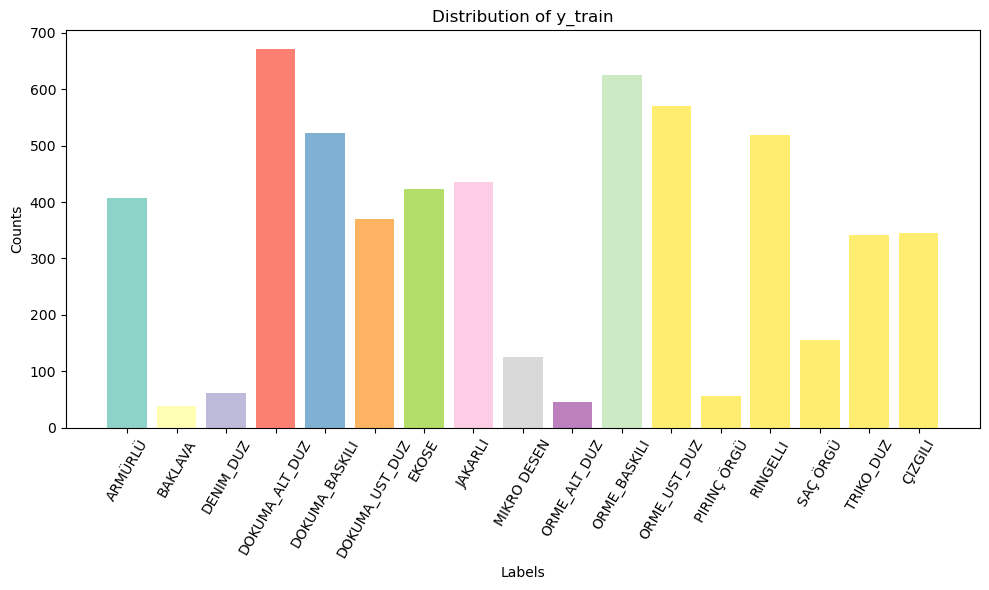

In [27]:
unique_labels, label_counts = np.unique(y_val, return_counts=True)
color_palette = plt.get_cmap('Set3')  # Choose a colormap
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_labels, label_counts, color=color_palette(range(len(unique_labels))))
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of y_train')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

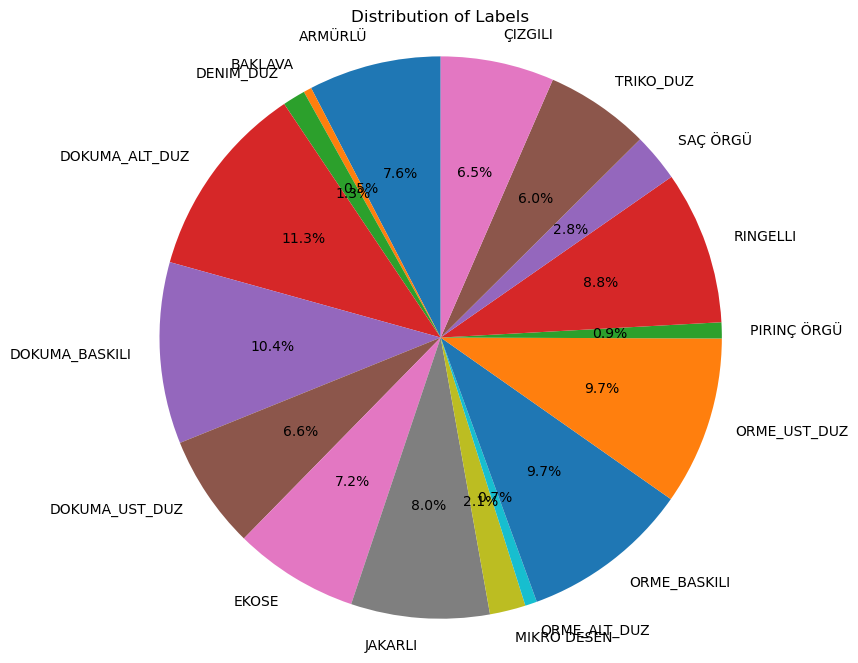

In [28]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8, 8))  
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels')
plt.axis('equal') 
plt.show()